## Import Libraries

In [1]:
import numpy as np 
import pandas as pd
import xgboost as xgb
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score, confusion_matrix, precision_recall_curve, f1_score, classification_report,
ConfusionMatrixDisplay, roc_curve, r2_score, auc, RocCurveDisplay, roc_curve, roc_auc_score) 
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from xgboost import XGBClassifier
from xgboost import plot_importance
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification 
import tensorflow as tf
from tensorflow import keras
import scikeras 
from scikeras.wrappers import KerasClassifier 
import os
import warnings
warnings.filterwarnings('ignore')


## Loading datasets: main CTG dataset, Pubmed dataset, and drug approval dataset

In [2]:
# loading the main CTG dataset, already contains study p-values
CTG=pd.read_csv('ctgALL_Extra_features0206_pval.csv')
CTG.shape

(164296, 71)

In [9]:
CTG.columns

Index(['NCT_Number', 'Completion_Year', 'retraction', 'Enrollment_std',
       'Enrollment_log_std', 'Start_Year_std', 'Completion_Year_std',
       'Study_Duration_Capped_std', 'Safety_Proportion_std',
       'Efficacy_Proportion_std', 'region_Simplified_East Asia',
       'region_Simplified_Europe', 'region_Simplified_North America',
       'region_Simplified_OTHER', 'Study_Status_Simplified_Completed',
       'Study_Status_Simplified_Ended_Early',
       'Study_Status_Simplified_Ongoing', 'Study_Status_Simplified_Unknown',
       'Sex_ALL', 'Sex_FEMALE', 'Sex_MALE', 'Age_Simplified_ADULT',
       'Age_Simplified_ALL', 'Age_Simplified_CHILD',
       'Age_Simplified_OLDER_ADULT', 'Phases_Simplified_PHASE1',
       'Phases_Simplified_PHASE2', 'Phases_Simplified_PHASE3',
       'Phases_Simplified_PHASE4', 'Funder_Simplified_Government',
       'Funder_Simplified_Industry', 'Funder_Simplified_Non-Governmental',
       'Funder_Simplified_Unknown', 'Study_Size_Huge', 'Study_Size_Large',
  

In [6]:
#Upload Pubmed publication file
CTG_PubMed=pd.read_csv('Pubmed_2025.csv')
print(dfr.shape)
print(dfr.columns)

(27636, 2)
Index(['NCT_Number', 'PMID'], dtype='object')


In [10]:
# Merging CTG_PubMed dataset to the main dataframe
df1 = CTG.merge(
    CTG_PubMed[['NCT_Number', 'PMID']],
    on='NCT_Number',
    how='left'
)

df1['Pubmed'] = df1['PMID'].apply(lambda x: True if pd.notna(x) else pd.NA)

In [8]:
df1.columns

Index(['NCT_Number', 'Completion_Year', 'retraction', 'Enrollment_std',
       'Enrollment_log_std', 'Start_Year_std', 'Completion_Year_std',
       'Study_Duration_Capped_std', 'Safety_Proportion_std',
       'Efficacy_Proportion_std', 'region_Simplified_East Asia',
       'region_Simplified_Europe', 'region_Simplified_North America',
       'region_Simplified_OTHER', 'Study_Status_Simplified_Completed',
       'Study_Status_Simplified_Ended_Early',
       'Study_Status_Simplified_Ongoing', 'Study_Status_Simplified_Unknown',
       'Sex_ALL', 'Sex_FEMALE', 'Sex_MALE', 'Age_Simplified_ADULT',
       'Age_Simplified_ALL', 'Age_Simplified_CHILD',
       'Age_Simplified_OLDER_ADULT', 'Phases_Simplified_PHASE1',
       'Phases_Simplified_PHASE2', 'Phases_Simplified_PHASE3',
       'Phases_Simplified_PHASE4', 'Funder_Simplified_Government',
       'Funder_Simplified_Industry', 'Funder_Simplified_Non-Governmental',
       'Funder_Simplified_Unknown', 'Study_Size_Huge', 'Study_Size_Large',
  

In [3]:
#Upload FDA drug approval file
CTG_drug = pd.read_csv('FDA_trial_success_any3_new.csv')
CTG_drug.columns

Index(['nct_id', 'reached_fda_milestone'], dtype='object')

In [5]:
CTG_drug.reached_fda_milestone.value_counts()

reached_fda_milestone
False    10635
True      1495
Name: count, dtype: int64

In [16]:
CTG_drug.rename(columns={
              'nct_id':'NCT_Number',
},inplace=True)
CTG_drug['reached_fda_milestone'] = CTG_drug['reached_fda_milestone'].replace(False, np.nan)

In [17]:
# Merging FDA approval dataset to the main dataframe
df2 = df1.merge(
    CTG_drug,
    on='NCT_Number',
    how='left',
    
)
print(df2.shape)

(164296, 74)


In [18]:
df2.columns

Index(['NCT_Number', 'Completion_Year', 'retraction', 'Enrollment_std',
       'Enrollment_log_std', 'Start_Year_std', 'Completion_Year_std',
       'Study_Duration_Capped_std', 'Safety_Proportion_std',
       'Efficacy_Proportion_std', 'region_Simplified_East Asia',
       'region_Simplified_Europe', 'region_Simplified_North America',
       'region_Simplified_OTHER', 'Study_Status_Simplified_Completed',
       'Study_Status_Simplified_Ended_Early',
       'Study_Status_Simplified_Ongoing', 'Study_Status_Simplified_Unknown',
       'Sex_ALL', 'Sex_FEMALE', 'Sex_MALE', 'Age_Simplified_ADULT',
       'Age_Simplified_ALL', 'Age_Simplified_CHILD',
       'Age_Simplified_OLDER_ADULT', 'Phases_Simplified_PHASE1',
       'Phases_Simplified_PHASE2', 'Phases_Simplified_PHASE3',
       'Phases_Simplified_PHASE4', 'Funder_Simplified_Government',
       'Funder_Simplified_Industry', 'Funder_Simplified_Non-Governmental',
       'Funder_Simplified_Unknown', 'Study_Size_Huge', 'Study_Size_Large',
  

In [19]:
#Limit studies to Phase 3 trials
df3=df2[
df2['Phases_Simplified_PHASE3'] == True]
df3.shape    

(37442, 74)

### Defining Success Labels
A study is labeled as successful if it was completed and meets at least one of the following criteria:
1. The primary endpoint showed statistical significance (p-value < 0.05)
2. The study was published in PubMed, based on the assumption that successful trials are more likely to be published
3. The investigational drug received FDA approval

Studies that were still ongoing, had an unknown status, or were too recent to assess publication or approval were excluded from the dataset. 

In [20]:
# Exploring value distribution in the study_success column (success is defined as p-value<0.05)
df3.study_success.value_counts()

study_success
success    4114
fail       1794
unknown    1006
Name: count, dtype: int64

In [21]:
# Convert values into categorical labels
def map_study_success(val):
    val = str(val).strip().lower()
    if val in ['success']:
        return 'Significant'
    elif val in ['fail']:
        return 'Non_Significant'
    else:
        return 'Unknown'

df3['study_success'] = df3['study_success'].apply(map_study_success)

In [22]:
df3.study_success.value_counts()

study_success
Unknown            31534
Significant         4114
Non_Significant     1794
Name: count, dtype: int64

In [23]:
df3.Pubmed.value_counts()

Pubmed
True    11418
Name: count, dtype: int64

In [24]:
df3.reached_fda_milestone.value_counts()

reached_fda_milestone
True    1495
Name: count, dtype: int64

In [70]:
# Defining failure label (CTG internal data):
df3.Study_Status_Simplified_Ended_Early.value_counts()

Study_Status_Simplified_Ended_Early
False    33788
True      3654
Name: count, dtype: int64

In [26]:
# Assigning final success/failure labels, based on all individual success/failure labels:

# Drop ongoing studies and studies with unknown status
df_clean = df3[
    (df3['Study_Status_Simplified_Ongoing'] != True) &
    (df3['Study_Status_Simplified_Unknown'] != True)
].copy()

# Initialize success_any with np.nan
df_clean['success_any'] = np.nan

# Assign False where failure criteria is met
df_clean.loc[
    (df_clean['Study_Status_Simplified_Ended_Early'] == True) |
    (df_clean['study_success'] == 'Non_Significant'),
    'success_any'
] = False

# Assign True where any success criteria is met
df_clean.loc[
    (df_clean['Pubmed'] == True) |
    (df_clean['reached_fda_milestone'] == True) |
    (df_clean['study_success'] == 'Significant'),
    'success_any'
] = True

# drop early-terminated studies with any success indicator due to the conflicting results
early_success_mask = (
    (df_clean['Study_Status_Simplified_Ended_Early'] == True) &
    (
        (df_clean['Pubmed'] == True) |
        (df_clean['study_success'] == 'Significant') 
    )
)

# Drop those studies from df_clean
df_clean = df_clean[~early_success_mask]

# Drop rows with unknown outcome
df_clean = df_clean[df_clean['success_any'].notna()].copy()
print(df_clean.shape)
print(df_clean.success_any.value_counts())

(15323, 75)
success_any
True     11779
False     3544
Name: count, dtype: int64


In [27]:
# Dropping original, non-standardized features and raw success labels:
columns_to_drop=['NCT_Number', 'Completion_Year', 'study_success','Sponsor', 'Enrollment', 'Sponsor_clean','PMID', 'Pubmed','Dropouts', 'Collaborators',
                 'reached_fda_milestone','Phases_Simplified_PHASE1',
       'Phases_Simplified_PHASE2', 'Phases_Simplified_PHASE3',
       'Phases_Simplified_PHASE4','Study_Status_Simplified_Completed',
       'Study_Status_Simplified_Ended_Early',
       'Study_Status_Simplified_Ongoing', 'Study_Status_Simplified_Unknown']
dfm= df_clean.drop(columns=columns_to_drop)

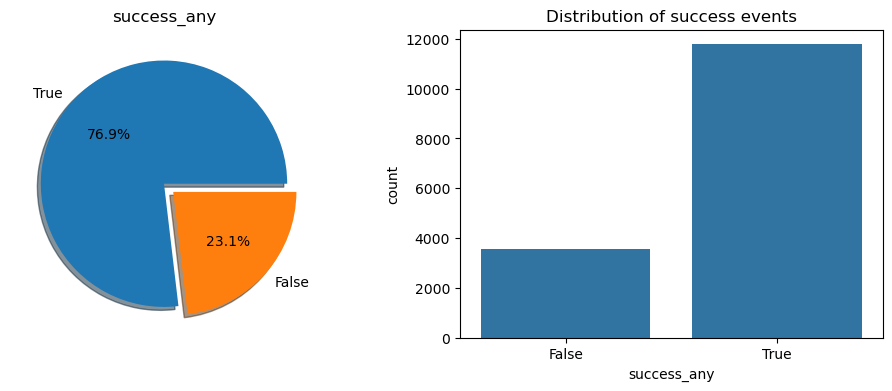

In [28]:
# Visualize the data:
success_counts = dfm['success_any'].value_counts()

# Create explode array of 0s, but explode the second slice (typically True)
explode = [0.1 if i == 1 else 0 for i in range(len(success_counts))]

# Plot
f, ax = plt.subplots(1, 2, figsize=(12, 4))
success_counts.plot.pie(explode=explode, autopct="%1.1f%%", ax=ax[0], shadow=True)
ax[0].set_title('success_any')
ax[0].set_ylabel('')
sns.countplot(x='success_any', data=dfm, ax=ax[1])
ax[1].set_title('Distribution of success events')
plt.show()

In [29]:
# Ensure target is proper boolean
dfm['success_any'] = dfm['success_any'].astype(bool)

## Splitting data to Train & Test

In [71]:
X = dfm.drop('success_any', axis=1)#all features without the outcome
y = dfm['success_any']
print('X shape: ', X.shape)
print('y shape: ', y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
# Save column names before scaling
feature_names = X_train.columns
# Scale and convert back to DataFrame
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=feature_names)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=feature_names)
# Scaling for the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X shape:  (15323, 55)
y shape:  (15323,)


### Model Building & Evaluation

### Logistic Regresssion model

In [72]:
# Count classes for balancing
neg = (dfm['success_any'] == False).sum()  
pos = (dfm['success_any'] == True).sum()  

scale_pos_weight = neg / pos
print("scale_pos_weight:", scale_pos_weight)


scale_pos_weight: 0.30087443755836657


Accuracy: 71.764%
Precision: 88.843%
Recall: 72.758%


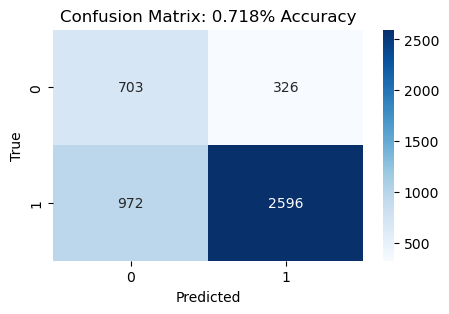

In [73]:
#Logistic regression with balancing
# Initialize Logistic Regression model with class_weight='balanced'
Log_model = LogisticRegression(class_weight='balanced', solver='liblinear', random_state=42) 
Log_model.fit(X_train, y_train)
Log_y_preds = Log_model.predict(X_test) 

Log_acc = accuracy_score(y_test, Log_y_preds)
Log_precision = precision_score(y_test, Log_y_preds)
Log_recall = recall_score(y_test, Log_y_preds)

print(f"Accuracy: {Log_acc * 100:.3f}%")
print(f"Precision: {Log_precision * 100:.3f}%")
print(f"Recall: {Log_recall * 100:.3f}%")

Log_conf_mat = confusion_matrix(y_test, Log_y_preds)
plt.figure(figsize=(5, 3))
sns.heatmap(Log_conf_mat, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(f'Confusion Matrix: {Log_acc:.3f}% Accuracy')
plt.show()

Fitting 5 folds for each of 20 candidates, totalling 100 fits
✅ Best Parameters: {'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}

📊 Classification Report:
              precision    recall  f1-score   support

       False       0.42      0.68      0.52      1029
        True       0.89      0.73      0.80      3568

    accuracy                           0.72      4597
   macro avg       0.65      0.70      0.66      4597
weighted avg       0.78      0.72      0.74      4597



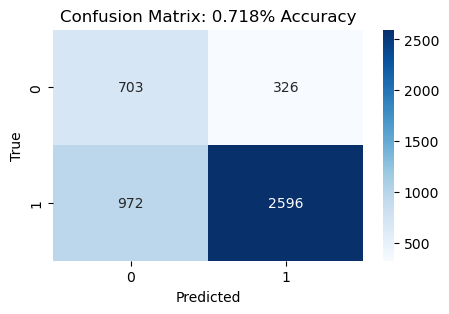

In [74]:
#Hyperparameter tuning:
# Define model and parameter grid
lr = LogisticRegression(max_iter=1000)

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear'],
    'class_weight': [None, 'balanced']
}

# Run Grid Search
grid_search = GridSearchCV(
    lr, param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=2
)
grid_search.fit(X_train, y_train)

best_lr = grid_search.best_estimator_
print("✅ Best Parameters:", grid_search.best_params_)

# Predict
y_pred = best_lr.predict(X_test)
y_proba = best_lr.predict_proba(X_test)[:, 1]  # for ROC

# Evaluation metrics
print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix

Log_conf_mat = confusion_matrix(y_test, Log_y_preds)
plt.figure(figsize=(5, 3))
sns.heatmap(Log_conf_mat, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(f'Confusion Matrix: {Log_acc:.3f}% Accuracy')
plt.show()


### Decision Tree model

Accuracy: 73.961%
Precision: 84.352%
Recall: 81.586%


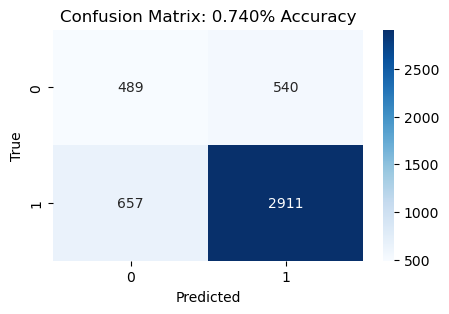

In [75]:
DT_model = DecisionTreeClassifier()
DT_model.fit(X_train, y_train)

DT_y_preds = DT_model.predict(X_test)

DT_acc = accuracy_score(y_test, DT_y_preds)
DT_precision = precision_score(y_test, DT_y_preds ) 
DT_recall = recall_score(y_test, DT_y_preds )  

print(f"Accuracy: {DT_acc * 100:.3f}%")
print(f"Precision: {DT_precision * 100:.3f}%")
print(f"Recall: {DT_recall * 100:.3f}%")

DT_conf_mat = confusion_matrix(y_test, DT_y_preds)
plt.figure(figsize=(5, 3))
sns.heatmap(DT_conf_mat, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(f'Confusion Matrix: {DT_acc:.3f}% Accuracy')
plt.show()

In [85]:
#Hyperparameter tuning:
DT_grid_params = {
    'criterion':['gini','entropy'],
    'max_depth' :  [3,5,7,10],
    'splitter' : ['best','radom'],
    'min_samples_leaf':[1,2,3,5,7], 
    'min_samples_split':[1,2,3,5,7], 
    'max_features':['auto','sqrt','log2']
}
DT_grid_search = GridSearchCV(DT_model, DT_grid_params, cv=5, n_jobs=-1, verbose = 1)#n_jobs=-1: acts in parallel, verbose=1: print while working
DT_grid_search.fit(X_train, y_train)
DT_grid_search.best_params_

Fitting 5 folds for each of 1200 candidates, totalling 6000 fits


{'criterion': 'gini',
 'max_depth': 7,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'splitter': 'best'}

Accuracy: 81.553%
Precision: 82.946%
Recall: 95.964%


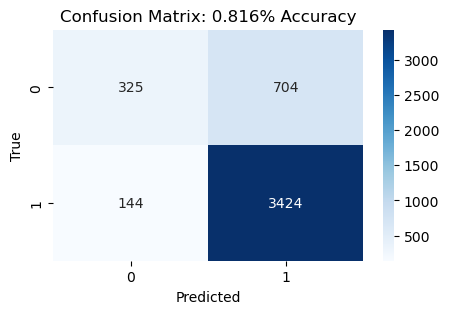

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 7,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [86]:
DT_model = DecisionTreeClassifier(criterion= 'gini',
 max_depth= 7,
 max_features= 'sqrt',
 min_samples_leaf= 1,
 min_samples_split= 3,
 splitter= 'best')
DT_model.fit(X_train, y_train)

DT_y_preds = DT_model.predict(X_test)

DT_acc = accuracy_score(y_test, DT_y_preds)
DT_precision = precision_score(y_test, DT_y_preds ) 
DT_recall = recall_score(y_test, DT_y_preds )  

print(f"Accuracy: {DT_acc * 100:.3f}%")
print(f"Precision: {DT_precision * 100:.3f}%")
print(f"Recall: {DT_recall * 100:.3f}%")

DT_conf_mat = confusion_matrix(y_test, DT_y_preds)
plt.figure(figsize=(5, 3))
sns.heatmap(DT_conf_mat, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(f'Confusion Matrix: {DT_acc:.3f}% Accuracy')
plt.show()

# Display the hyperparameters of the model
DT_model.get_params()

### Random Forest model

Accuracy: 83.533%
Precision: 84.850%
Recall: 95.908%


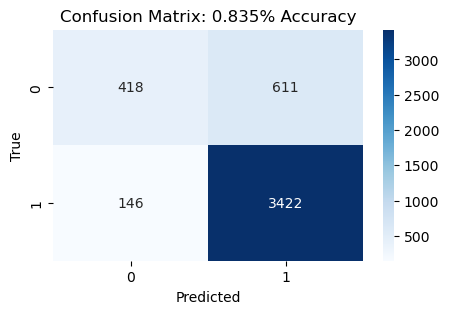

In [87]:
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)

rf_y_preds = rf_model.predict(X_test)

rf_acc = accuracy_score(y_test, rf_y_preds)
rf_precision = precision_score(y_test, rf_y_preds ) 
rf_recall = recall_score(y_test, rf_y_preds )  

print(f"Accuracy: {rf_acc * 100:.3f}%")
print(f"Precision: {rf_precision * 100:.3f}%")
print(f"Recall: {rf_recall * 100:.3f}%")

rf_conf_mat = confusion_matrix(y_test, rf_y_preds)
plt.figure(figsize=(5, 3))
sns.heatmap(rf_conf_mat, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(f'Confusion Matrix: {rf_acc:.3f}% Accuracy')
plt.show()

In [88]:
#Hyperparameter tuning:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2'],
    'class_weight': [None, 'balanced']
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='f1', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_
print("✅ Best params:", grid_search.best_params_)


Fitting 5 folds for each of 144 candidates, totalling 720 fits
✅ Best params: {'class_weight': None, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


In [89]:
# Predict
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)
y_proba = best_rf.predict_proba(X_test)[:, 1]

# Confusion matrix
print(f"Accuracy: {rf_acc * 100:.3f}%")
print(f"Precision: {rf_precision * 100:.3f}%")
print(f"Recall: {rf_recall * 100:.3f}%")


Accuracy: 83.533%
Precision: 84.850%
Recall: 95.908%


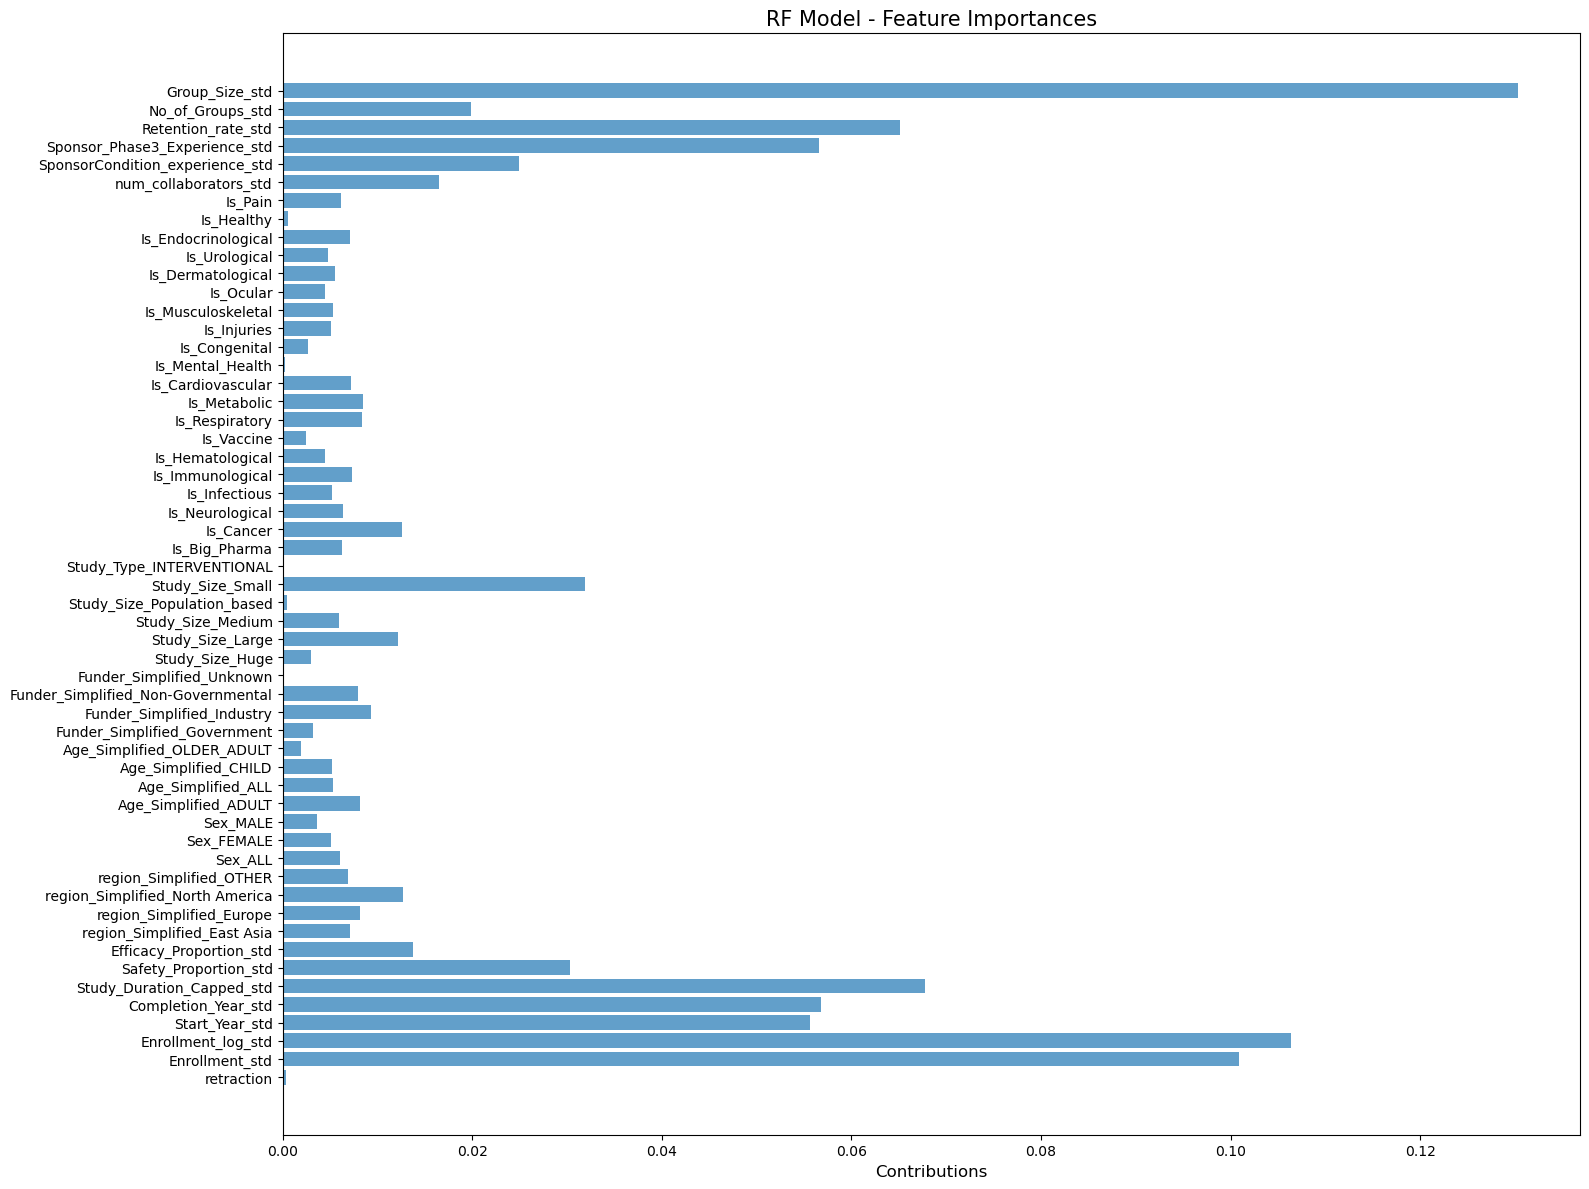

In [90]:
# Feature importance:
feature_names = X_train_scaled.columns
importances = best_rf.feature_importances_

# Plot
y_pos = np.arange(len(feature_names))

fig, ax = plt.subplots(figsize=(16, 12))
ax.barh(y_pos, importances, align='center', alpha=0.7)
ax.set_yticks(y_pos)
ax.set_yticklabels(feature_names, fontsize=10)
ax.set_xlabel('Contributions', fontsize=12)
ax.set_title('RF Model - Feature Importances', fontsize=15)

plt.tight_layout()
plt.show()


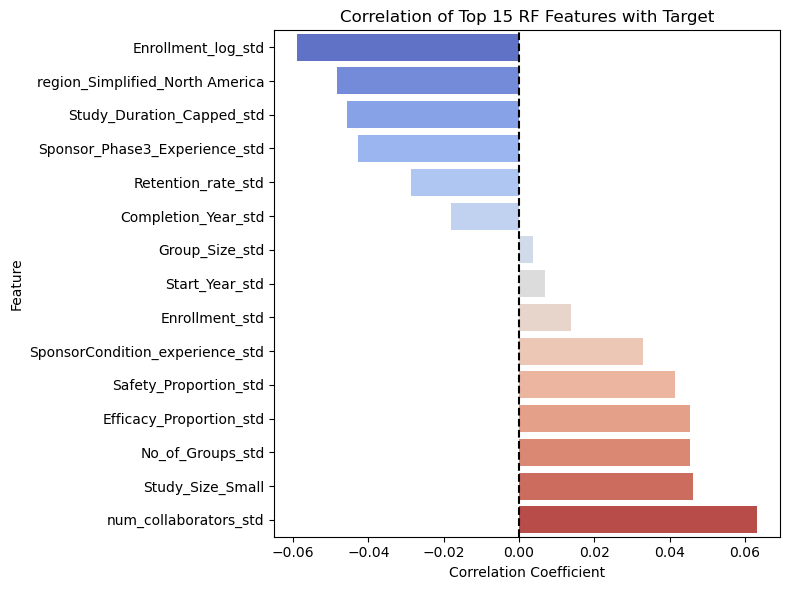

In [91]:
# Correlation of important features with the target:

rf_importances = pd.DataFrame({
    'Feature': X_train_scaled.columns,
    'Importance': best_rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Select top 15 features
top10_features = rf_importances.head(15)['Feature'].tolist()

# Compute correlation with the target for those features
df_corr = X_train_scaled[top10_features].copy()
df_corr['target'] = y_train
correlations = df_corr.corr()['target'].drop('target').sort_values()

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(x=correlations.values, y=correlations.index, palette='coolwarm', orient='h')
plt.axvline(0, color='black', linestyle='--')
plt.title('Correlation of Top 15 RF Features with Target')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


### XGBoost model

In [92]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Accuracy: 83.076%
Precision: 85.605%
Recall: 94.002%


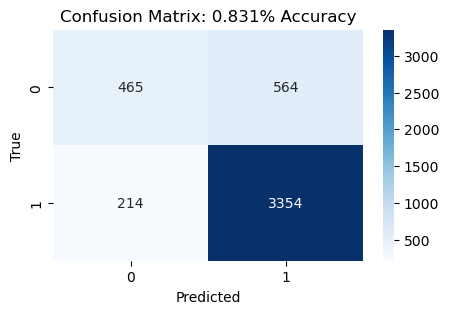

In [93]:
xgb_y_preds = xgb_model.predict(X_test)

xgb_acc = accuracy_score(y_test, xgb_y_preds)
xgb_precision = precision_score(y_test, xgb_y_preds ) 
xgb_recall = recall_score(y_test, xgb_y_preds )  

print(f"Accuracy: {xgb_acc * 100:.3f}%")
print(f"Precision: {xgb_precision * 100:.3f}%")
print(f"Recall: {xgb_recall * 100:.3f}%")

xgb_conf_mat = confusion_matrix(y_test, xgb_y_preds)
plt.figure(figsize=(5, 3))
sns.heatmap(xgb_conf_mat, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(f'Confusion Matrix: {xgb_acc:.3f}% Accuracy')
plt.show()

In [94]:
## Handling imbalanced data
# Compute scale_pos_weight to handle class imbalance
neg = (y_train == False).sum()
pos = (y_train == 1).sum()
scale_pos_weight = neg / pos
print(f"scale_pos_weight: {scale_pos_weight:.2f}")

# Train the XGBoost model
model = XGBClassifier(
    scale_pos_weight=scale_pos_weight,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)
model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, digits=3))


scale_pos_weight: 0.31
              precision    recall  f1-score   support

       False      0.512     0.648     0.572      1029
        True      0.890     0.822     0.855      3568

    accuracy                          0.783      4597
   macro avg      0.701     0.735     0.713      4597
weighted avg      0.805     0.783     0.791      4597



After SMOTE: [8211 8211]


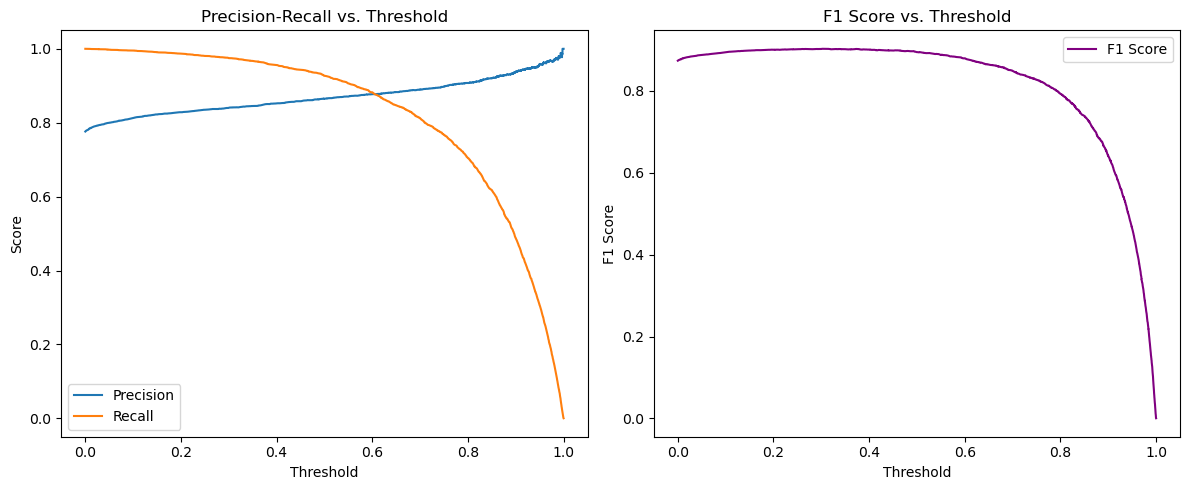


Threshold: 0.30
              precision    recall  f1-score   support

       False      0.804     0.360     0.497      1029
        True      0.841     0.975     0.903      3568

    accuracy                          0.837      4597
   macro avg      0.823     0.667     0.700      4597
weighted avg      0.833     0.837     0.812      4597


Threshold: 0.40
              precision    recall  f1-score   support

       False      0.737     0.426     0.540      1029
        True      0.852     0.956     0.901      3568

    accuracy                          0.838      4597
   macro avg      0.795     0.691     0.721      4597
weighted avg      0.827     0.838     0.820      4597


Threshold: 0.50
              precision    recall  f1-score   support

       False      0.663     0.499     0.569      1029
        True      0.865     0.927     0.895      3568

    accuracy                          0.831      4597
   macro avg      0.764     0.713     0.732      4597
weighted avg      0.820

In [96]:
#Fixing imbalance with SMOTE (generating synthetic data)
# Apply SMOTE to training data
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)
print(f"After SMOTE: {np.bincount(y_train_sm)}")

# Train XGBoost on SMOTE-balanced data
model = XGBClassifier(
    scale_pos_weight=1,  # Reset since SMOTE balanced it
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)
model.fit(X_train_sm, y_train_sm)

# Predict probabilities and tune threshold
y_probs = model.predict_proba(X_test)[:, 1]
precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs)
f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-6)

# Plot threshold vs metrics
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(thresholds, precisions[:-1], label='Precision')
plt.plot(thresholds, recalls[:-1], label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision-Recall vs. Threshold')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(thresholds, f1_scores[:-1], color='purple', label='F1 Score')
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.title('F1 Score vs. Threshold')
plt.legend()

plt.tight_layout()
plt.show()

# Report performance at a few thresholds
for t in [0.3, 0.4, 0.5, 0.6]:
    y_pred_thresh = (y_probs >= t)
    print(f"\nThreshold: {t:.2f}")
    print(classification_report(y_test, y_pred_thresh, digits=3))


In [97]:
# Use tuned threshold of 0.60 for final predictions
y_pred_final = (y_probs >= 0.60).astype(int)

print("Final classification at threshold = 0.60:")
print(classification_report(y_test, y_pred_final, digits=3))

Final classification at threshold = 0.60:
              precision    recall  f1-score   support

       False      0.584     0.572     0.578      1029
        True      0.877     0.882     0.880      3568

    accuracy                          0.813      4597
   macro avg      0.731     0.727     0.729      4597
weighted avg      0.812     0.813     0.812      4597



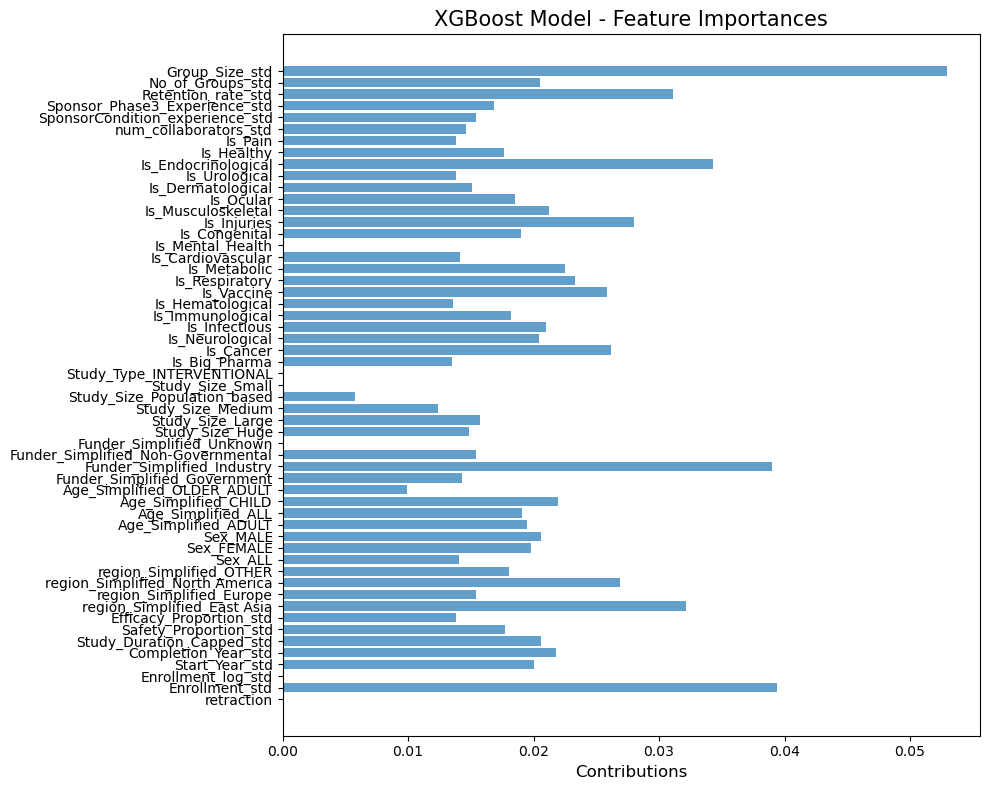

In [98]:
# Get correct feature names from training data
feature_names = X_train_scaled.columns  
importance = xgb_model.feature_importances_

# Plot
y_pos = np.arange(len(feature_names))
fig, ax = plt.subplots(figsize=(10, 8))
ax.barh(y_pos, importance, align='center', alpha=0.7)
ax.set_yticks(y_pos)
ax.set_yticklabels(feature_names, fontsize=10)
ax.set_xlabel('Contributions', fontsize=12)
ax.set_title('XGBoost Model - Feature Importances', fontsize=15)

plt.tight_layout()
plt.show()


In [99]:
# Create a DataFrame of feature importances

xgb_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

# Show all rows
print(xgb_importance_df.to_string())


                               Feature  Importance
54                      Group_Size_std    0.052932
1                       Enrollment_std    0.039427
20          Funder_Simplified_Industry    0.039007
46                 Is_Endocrinological    0.034338
8          region_Simplified_East Asia    0.032166
52                  Retention_rate_std    0.031086
41                         Is_Injuries    0.028042
10     region_Simplified_North America    0.026889
30                           Is_Cancer    0.026182
35                          Is_Vaccine    0.025816
36                      Is_Respiratory    0.023321
37                        Is_Metabolic    0.022466
17                Age_Simplified_CHILD    0.021924
4                  Completion_Year_std    0.021804
42                  Is_Musculoskeletal    0.021256
32                       Is_Infectious    0.021030
14                            Sex_MALE    0.020573
5            Study_Duration_Capped_std    0.020570
53                    No_of_Gro

### Decision Tree model

Accuracy: 74.179%
Precision: 84.378%
Recall: 81.895%


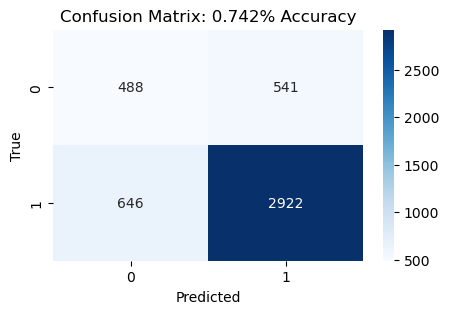

In [100]:
DT_model = DecisionTreeClassifier()
DT_model.fit(X_train, y_train)

DT_y_preds = DT_model.predict(X_test)

DT_acc = accuracy_score(y_test, DT_y_preds)
DT_precision = precision_score(y_test, DT_y_preds ) 
DT_recall = recall_score(y_test, DT_y_preds )  

print(f"Accuracy: {DT_acc * 100:.3f}%")
print(f"Precision: {DT_precision * 100:.3f}%")
print(f"Recall: {DT_recall * 100:.3f}%")

DT_conf_mat = confusion_matrix(y_test, DT_y_preds)
plt.figure(figsize=(5, 3))
sns.heatmap(DT_conf_mat, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(f'Confusion Matrix: {DT_acc:.3f}% Accuracy')
plt.show()

In [101]:
#Hyperparameter tuning:
DT_grid_params = {
    'criterion':['gini','entropy'],
    'max_depth' :  [3,5,7,10],
    'splitter' : ['best','random'],
    'min_samples_leaf':[1,2,3,5,7], 
    'min_samples_split':[1,2,3,5,7], 
    'max_features':['auto','sqrt','log2']
}
DT_grid_search = GridSearchCV(DT_model, DT_grid_params, cv=5, n_jobs=-1, verbose = 1)#n_jobs=-1: acts in parallel, verbose=1: print while working
DT_grid_search.fit(X_train, y_train)
DT_grid_search.best_params_

Fitting 5 folds for each of 1200 candidates, totalling 6000 fits


{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'sqrt',
 'min_samples_leaf': 7,
 'min_samples_split': 3,
 'splitter': 'best'}

Accuracy: 81.423%
Precision: 82.433%
Recall: 96.665%


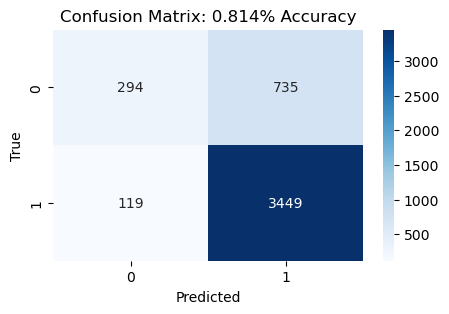

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 7,
 'min_samples_split': 3,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [102]:
dt_best_model = DecisionTreeClassifier(criterion= 'gini',
 max_depth= 5,
 max_features= 'sqrt',
 min_samples_leaf= 7,
 min_samples_split= 3,
 splitter= 'best')
dt_best_model.fit(X_train, y_train)

DT_y_preds = dt_best_model.predict(X_test)

DT_acc = accuracy_score(y_test, DT_y_preds)
DT_precision = precision_score(y_test, DT_y_preds ) 
DT_recall = recall_score(y_test, DT_y_preds )  

print(f"Accuracy: {DT_acc * 100:.3f}%")
print(f"Precision: {DT_precision * 100:.3f}%")
print(f"Recall: {DT_recall * 100:.3f}%")

DT_conf_mat = confusion_matrix(y_test, DT_y_preds)
plt.figure(figsize=(5, 3))
sns.heatmap(DT_conf_mat, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(f'Confusion Matrix: {DT_acc:.3f}% Accuracy')
plt.show()

# Display the hyperparameters of the model
dt_best_model.get_params()

### Random Forest model

Accuracy: 83.489%
Precision: 84.842%
Recall: 95.852%


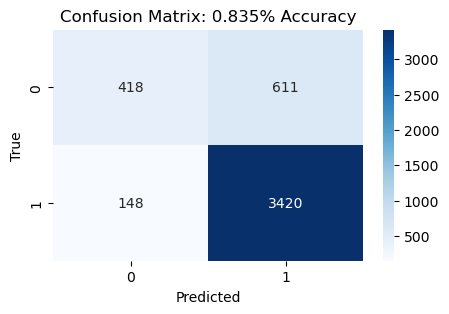

In [103]:
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)

rf_y_preds = rf_model.predict(X_test)

rf_acc = accuracy_score(y_test, rf_y_preds)
rf_precision = precision_score(y_test, rf_y_preds ) 
rf_recall = recall_score(y_test, rf_y_preds )  

print(f"Accuracy: {rf_acc * 100:.3f}%")
print(f"Precision: {rf_precision * 100:.3f}%")
print(f"Recall: {rf_recall * 100:.3f}%")

rf_conf_mat = confusion_matrix(y_test, rf_y_preds)
plt.figure(figsize=(5, 3))
sns.heatmap(rf_conf_mat, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(f'Confusion Matrix: {rf_acc:.3f}% Accuracy')
plt.show()

In [104]:
#Hyperparameter tuning:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2'],
    'class_weight': [None, 'balanced']
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='f1', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_
print("✅ Best params:", grid_search.best_params_)


Fitting 5 folds for each of 144 candidates, totalling 720 fits
✅ Best params: {'class_weight': None, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


In [105]:
# Predict
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)
y_proba = best_rf.predict_proba(X_test)[:, 1]

# Confusion matrix
print(f"Accuracy: {rf_acc * 100:.3f}%")
print(f"Precision: {rf_precision * 100:.3f}%")
print(f"Recall: {rf_recall * 100:.3f}%")


Accuracy: 83.489%
Precision: 84.842%
Recall: 95.852%


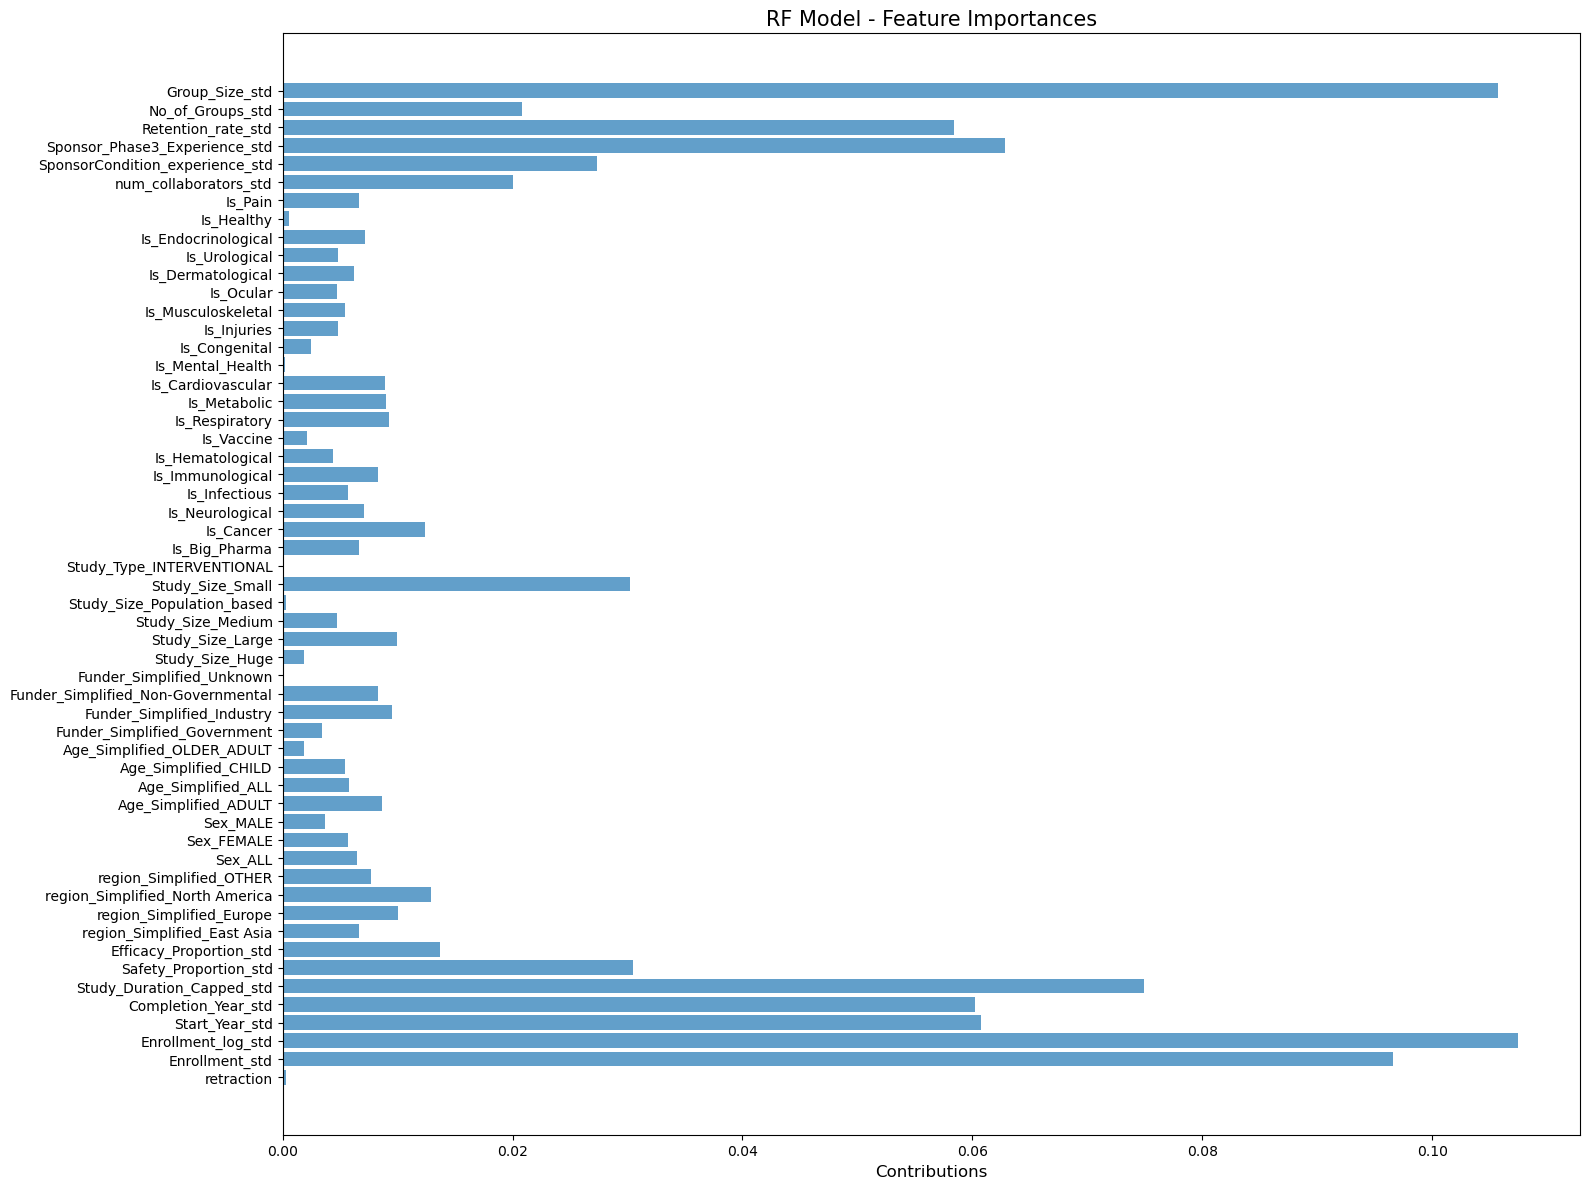

                               Feature  Importance
2                   Enrollment_log_std    0.107484
54                      Group_Size_std    0.105695
1                       Enrollment_std    0.096619
5            Study_Duration_Capped_std    0.074929
51       Sponsor_Phase3_Experience_std    0.062879
3                       Start_Year_std    0.060793
4                  Completion_Year_std    0.060255
52                  Retention_rate_std    0.058414
6                Safety_Proportion_std    0.030441
27                    Study_Size_Small    0.030204
50     SponsorCondition_experience_std    0.027351
53                    No_of_Groups_std    0.020842
49               num_collaborators_std    0.020048
7              Efficacy_Proportion_std    0.013703
10     region_Simplified_North America    0.012881
30                           Is_Cancer    0.012359
9             region_Simplified_Europe    0.010049
24                    Study_Size_Large    0.009993
20          Funder_Simplified_I

In [106]:
# Feature importance:
feature_names = X_train_scaled.columns
importances = rf_model.feature_importances_

# Plot
y_pos = np.arange(len(feature_names))

fig, ax = plt.subplots(figsize=(16, 12))
ax.barh(y_pos, importances, align='center', alpha=0.7)
ax.set_yticks(y_pos)
ax.set_yticklabels(feature_names, fontsize=10)
ax.set_xlabel('Contributions', fontsize=12)
ax.set_title('RF Model - Feature Importances', fontsize=15)

plt.tight_layout()
plt.show()
# Create DataFrame of feature importances

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Display the table
print(importance_df.to_string()) 


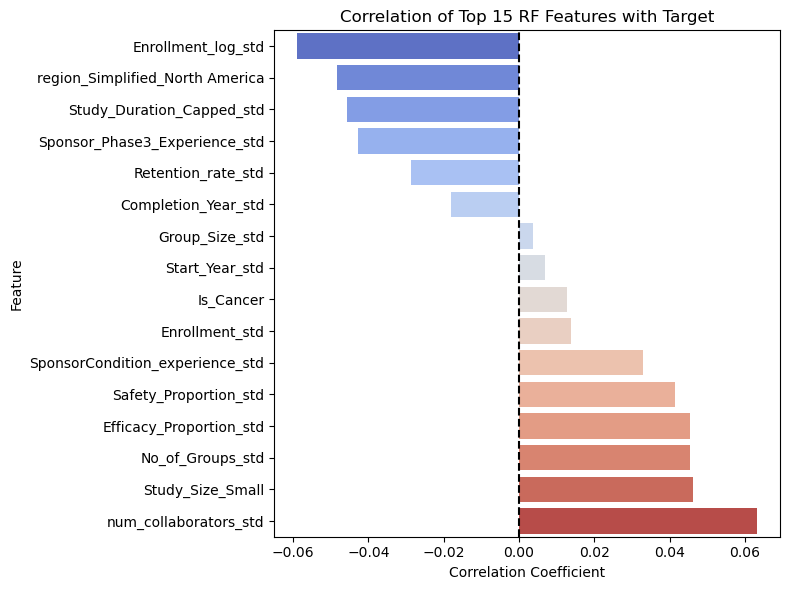

In [107]:
# Correlation of important features with the target:

rf_importances = pd.DataFrame({
    'Feature': X_train_scaled.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Select top 10 features
top10_features = rf_importances.head(16)['Feature'].tolist()

# Compute correlation with the target for those features
df_corr = X_train_scaled[top10_features].copy()
df_corr['target'] = y_train
correlations = df_corr.corr()['target'].drop('target').sort_values()

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(x=correlations.values, y=correlations.index, palette='coolwarm', orient='h')
plt.axvline(0, color='black', linestyle='--')
plt.title('Correlation of Top 15 RF Features with Target')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


### XGBoost model

In [108]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Accuracy: 83.076%
Precision: 85.605%
Recall: 94.002%


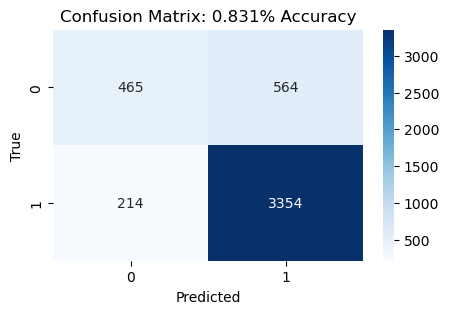

In [109]:
xgb_y_preds = xgb_model.predict(X_test)

xgb_acc = accuracy_score(y_test, xgb_y_preds)
xgb_precision = precision_score(y_test, xgb_y_preds ) 
xgb_recall = recall_score(y_test, xgb_y_preds )  

print(f"Accuracy: {xgb_acc * 100:.3f}%")
print(f"Precision: {xgb_precision * 100:.3f}%")
print(f"Recall: {xgb_recall * 100:.3f}%")

xgb_conf_mat = confusion_matrix(y_test, xgb_y_preds)
plt.figure(figsize=(5, 3))
sns.heatmap(xgb_conf_mat, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(f'Confusion Matrix: {xgb_acc:.3f}% Accuracy')
plt.show()

In [110]:
## Handling imbalanced data
# Compute scale_pos_weight to handle class imbalance
neg = (y_train == False).sum()
pos = (y_train == 1).sum()
scale_pos_weight = neg / pos
print(f"scale_pos_weight: {scale_pos_weight:.2f}")

# Train the XGBoost model
model = XGBClassifier(
    scale_pos_weight=scale_pos_weight,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)
model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, digits=3))

scale_pos_weight: 0.31
              precision    recall  f1-score   support

       False      0.512     0.648     0.572      1029
        True      0.890     0.822     0.855      3568

    accuracy                          0.783      4597
   macro avg      0.701     0.735     0.713      4597
weighted avg      0.805     0.783     0.791      4597



After SMOTE: [8211 8211]


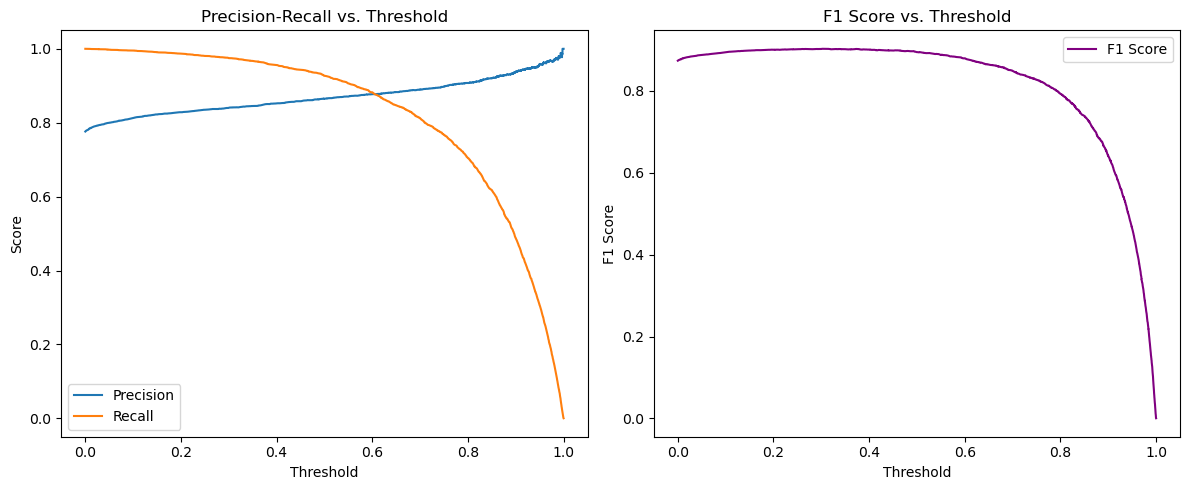


Threshold: 0.30
              precision    recall  f1-score   support

       False      0.804     0.360     0.497      1029
        True      0.841     0.975     0.903      3568

    accuracy                          0.837      4597
   macro avg      0.823     0.667     0.700      4597
weighted avg      0.833     0.837     0.812      4597


Threshold: 0.40
              precision    recall  f1-score   support

       False      0.737     0.426     0.540      1029
        True      0.852     0.956     0.901      3568

    accuracy                          0.838      4597
   macro avg      0.795     0.691     0.721      4597
weighted avg      0.827     0.838     0.820      4597


Threshold: 0.50
              precision    recall  f1-score   support

       False      0.663     0.499     0.569      1029
        True      0.865     0.927     0.895      3568

    accuracy                          0.831      4597
   macro avg      0.764     0.713     0.732      4597
weighted avg      0.820

In [111]:
#Fixing imbalance with SMOTE (generating synthetic data)
# Apply SMOTE to training data
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)
print(f"After SMOTE: {np.bincount(y_train_sm)}")

# Train XGBoost on SMOTE-balanced data
model = XGBClassifier(
    scale_pos_weight=1,  # Reset since SMOTE balanced it
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)
model.fit(X_train_sm, y_train_sm)

# Predict probabilities and tune threshold
y_probs = model.predict_proba(X_test)[:, 1]
precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs)
f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-6)

# Plot threshold vs metrics
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(thresholds, precisions[:-1], label='Precision')
plt.plot(thresholds, recalls[:-1], label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision-Recall vs. Threshold')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(thresholds, f1_scores[:-1], color='purple', label='F1 Score')
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.title('F1 Score vs. Threshold')
plt.legend()

plt.tight_layout()
plt.show()

# Report performance at a few thresholds
for t in [0.3, 0.4, 0.5, 0.6]:
    y_pred_thresh = (y_probs >= t)
    print(f"\nThreshold: {t:.2f}")
    print(classification_report(y_test, y_pred_thresh, digits=3))



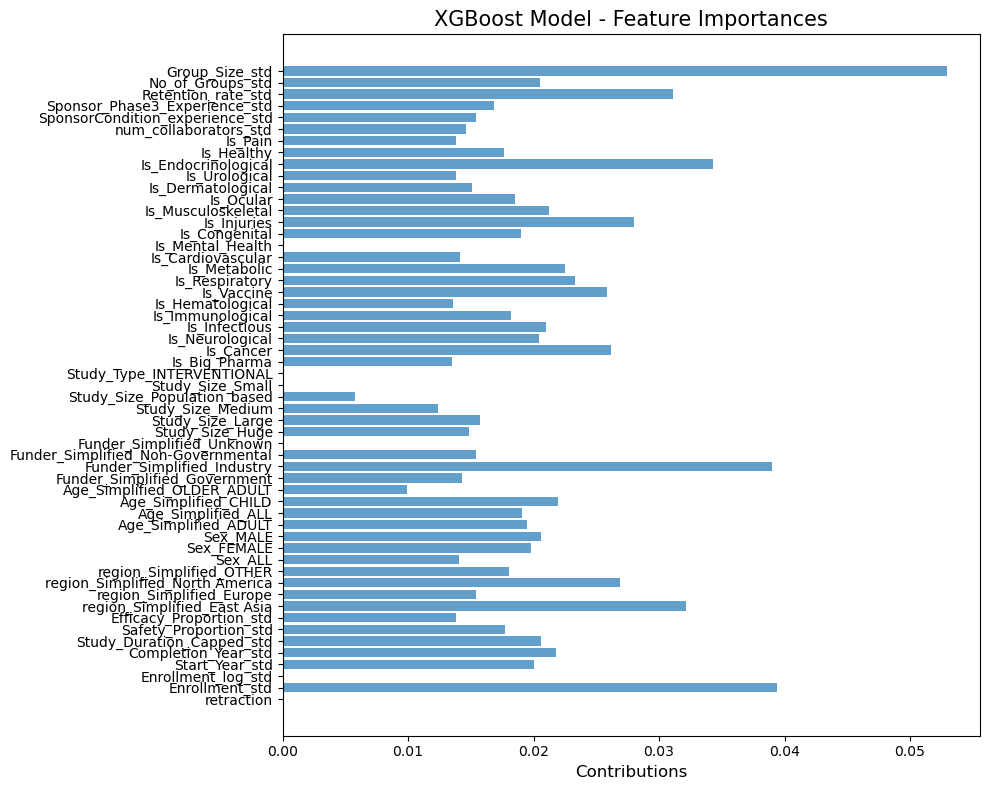

                               Feature  Importance
54                      Group_Size_std    0.052932
1                       Enrollment_std    0.039427
20          Funder_Simplified_Industry    0.039007
46                 Is_Endocrinological    0.034338
8          region_Simplified_East Asia    0.032166
52                  Retention_rate_std    0.031086
41                         Is_Injuries    0.028042
10     region_Simplified_North America    0.026889
30                           Is_Cancer    0.026182
35                          Is_Vaccine    0.025816
36                      Is_Respiratory    0.023321
37                        Is_Metabolic    0.022466
17                Age_Simplified_CHILD    0.021924
4                  Completion_Year_std    0.021804
42                  Is_Musculoskeletal    0.021256
32                       Is_Infectious    0.021030
14                            Sex_MALE    0.020573
5            Study_Duration_Capped_std    0.020570
53                    No_of_Gro

In [112]:
# Get feature names from training data
feature_names = X_train_scaled.columns  
importance = xgb_model.feature_importances_

# Plot
y_pos = np.arange(len(feature_names))
fig, ax = plt.subplots(figsize=(10, 8))
ax.barh(y_pos, importance, align='center', alpha=0.7)
ax.set_yticks(y_pos)
ax.set_yticklabels(feature_names, fontsize=10)
ax.set_xlabel('Contributions', fontsize=12)
ax.set_title('XGBoost Model - Feature Importances', fontsize=15)

plt.tight_layout()
plt.show()
# Create a DataFrame of feature importances

xgb_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

# Show all rows
print(xgb_importance_df.to_string())


                           Feature  Importance  Correlation  Signed_Correlation
                    Group_Size_std    0.052932     0.033821            0.033821
                    Enrollment_std    0.039427     0.053714            0.053714
        Funder_Simplified_Industry    0.039007     0.052575            0.052575
               Is_Endocrinological    0.034338     0.005401            0.005401
       region_Simplified_East Asia    0.032166     0.075427            0.075427
                Retention_rate_std    0.031086     0.078277            0.078277
                       Is_Injuries    0.028042     0.057979           -0.057979
   region_Simplified_North America    0.026889     0.124969           -0.124969
                         Is_Cancer    0.026182     0.050309           -0.050309
                        Is_Vaccine    0.025816     0.083040            0.083040
                    Is_Respiratory    0.023321     0.007229           -0.007229
                      Is_Metabolic    0.

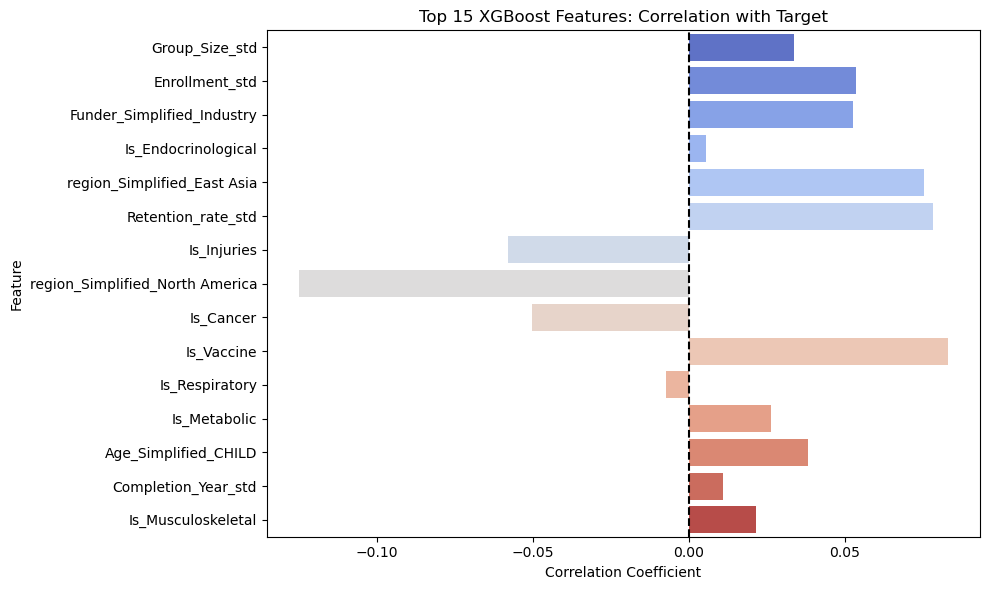

In [113]:
# Compute correlations with the target
# (Assumes dfm contains both features and 'success_any' as the binary target)

correlations = dfm[X_train_scaled.columns].corrwith(dfm['success_any'])

# Sort by absolute value of correlation
correlation_df = correlations.abs().sort_values(ascending=False).to_frame(name='Correlation')
correlation_df['Signed_Correlation'] = correlations  # add signed value

# Reset index to have 'Feature' column
correlation_df = correlation_df.reset_index().rename(columns={'index': 'Feature'})

# Merge with XGBoost importance
xgb_corr_merged = xgb_importance_df.merge(correlation_df, on='Feature', how='left')

# Sort and display
xgb_corr_merged = xgb_corr_merged.sort_values(by='Importance', ascending=False)

# Print full table
print(xgb_corr_merged.to_string(index=False))

# Optional: Plot correlation for top features

top_corr = xgb_corr_merged.head(15)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_corr, x='Signed_Correlation', y='Feature', palette='coolwarm')
plt.axvline(0, linestyle='--', color='k')
plt.title('Top 15 XGBoost Features: Correlation with Target')
plt.xlabel('Correlation Coefficient')
plt.tight_layout()
plt.show()


In [114]:
# Use tuned threshold of 0.60 for final predictions
y_pred_final = (y_probs >= 0.60).astype(int)

print("Final classification at threshold = 0.60:")
print(classification_report(y_test, y_pred_final, digits=3))

Final classification at threshold = 0.60:
              precision    recall  f1-score   support

       False      0.584     0.572     0.578      1029
        True      0.877     0.882     0.880      3568

    accuracy                          0.813      4597
   macro avg      0.731     0.727     0.729      4597
weighted avg      0.812     0.813     0.812      4597



In [115]:
# hyperparameter tuning
# Define XGBoost Model 
# Initialize XGBoost Classifier 
xgb_model = XGBClassifier(
    objective='binary:logistic', 
    eval_metric='logloss',       
    use_label_encoder=False,     
    random_state=42
)
# Define Hyperparameter Grid for GridSearchCV 
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'subsample': [0.8, 1.0]
}
# Perform Grid Search ---
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    cv=5,                 
    scoring='accuracy',  
    n_jobs=-1,            
    verbose=2             
)
print("Starting GridSearchCV...")
grid_search.fit(X_train, y_train)

# Get Best Model and Parameters 
best_xgb_model = grid_search.best_estimator_

print("\n--- GridSearchCV Results ---")
print("✅ Best parameters found:", grid_search.best_params_)
print(f"✅ Best cross-validation score: {grid_search.best_score_:.4f}")

# Evaluate on the test set
y_pred = best_xgb_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Set Accuracy: {test_accuracy:.4f}")

Starting GridSearchCV...
Fitting 5 folds for each of 24 candidates, totalling 120 fits

--- GridSearchCV Results ---
✅ Best parameters found: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.8}
✅ Best cross-validation score: 0.8296
Test Set Accuracy: 0.8362


## SVM model

Accuracy: 82.576%
Precision: 84.287%
Recall: 95.320%


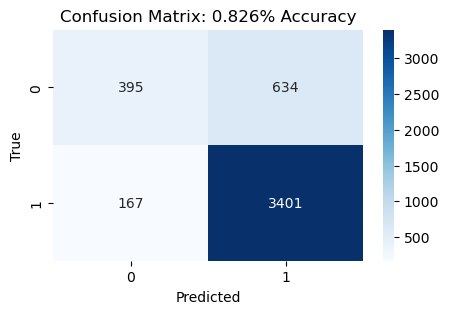

In [51]:
svc_model = SVC(C=10, gamma = 0.01, probability=True)
svc_model.fit(X_train, y_train)
svc_y_preds = svc_model.predict(X_test)

svc_acc = accuracy_score(y_test, svc_y_preds)
svc_precision = precision_score(y_test, svc_y_preds ) 
svc_recall = recall_score(y_test, svc_y_preds )  

print(f"Accuracy: {svc_acc * 100:.3f}%")
print(f"Precision: {svc_precision * 100:.3f}%")
print(f"Recall: {svc_recall * 100:.3f}%")

svc_conf_mat = confusion_matrix(y_test, svc_y_preds)
plt.figure(figsize=(5, 3))
sns.heatmap(svc_conf_mat, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(f'Confusion Matrix: {svc_acc:.3f}% Accuracy')
plt.show()

### Neural Network model

Accuracy: 79.835%
Precision: 85.469%
Recall: 89.182%


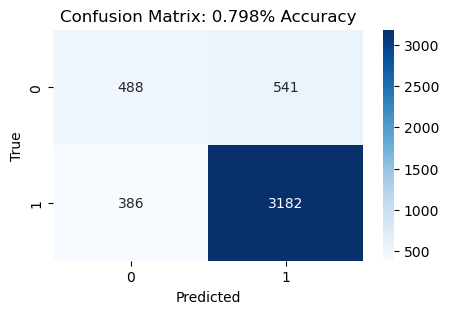

In [116]:
NN_model = MLPClassifier(random_state=42, max_iter=300).fit(X_train, y_train)
NN_y_preds = NN_model.predict(X_test)

NN_acc = accuracy_score(y_test, NN_y_preds)
NN_precision = precision_score(y_test, NN_y_preds ) 
NN_recall = recall_score(y_test, NN_y_preds )  

print(f"Accuracy: {NN_acc * 100:.3f}%")
print(f"Precision: {NN_precision * 100:.3f}%")
print(f"Recall: {NN_recall * 100:.3f}%")

NN_conf_mat = confusion_matrix(y_test, NN_y_preds)
plt.figure(figsize=(5, 3))
sns.heatmap(NN_conf_mat, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(f'Confusion Matrix: {NN_acc:.3f}% Accuracy')
plt.show()

In [61]:
#Hyperparameter tuning:
# Suppress TensorFlow warnings
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # Suppress info and warning messages

print(f"TensorFlow Version: {tf.__version__}")
print(f"Scikeras Version: {scikeras.__version__}")


# Define the Keras Model Creation Function
def create_model(num_hidden_layers=1, units=32, learning_rate=0.001, activation='relu', optimizer='Adam', dropout_rate=0.0):
    model = keras.Sequential()
    # Input layer
    model.add(keras.layers.Input(shape=(X_train_scaled.shape[1],)))

    # Hidden layers
    for _ in range(num_hidden_layers):
        model.add(keras.layers.Dense(units=units, activation=activation))
        if dropout_rate > 0:
            model.add(keras.layers.Dropout(dropout_rate))

    # Output layer for binary classification
    model.add(keras.layers.Dense(units=1, activation='sigmoid')) # Use 'softmax' for multi-class and appropriate units

    # Compile the model
   
    if optimizer == 'Adam':
        opt = keras.optimizers.Adam(learning_rate=learning_rate)
    elif optimizer == 'SGD':
        opt = keras.optimizers.SGD(learning_rate=learning_rate)
    else:
        opt = keras.optimizers.Adam(learning_rate=learning_rate) # Default to Adam

    model.compile(optimizer=opt,
                  loss='binary_crossentropy', # Use 'categorical_crossentropy' for multi-class
                  metrics=['accuracy'])
    return model

# Pass the function that creates the model
keras_clf = KerasClassifier(
    model=create_model,
    verbose=0, # Suppress Keras training output during tuning
    epochs=10, # Set a base number of epochs for each trial
    batch_size=32 # Set a base batch size
)

# Define Hyperparameter Distribution for Randomized Search 
param_dist = {
    'model__num_hidden_layers': [1, 2, 3], 
    'model__units': [16, 32, 64, 128],    
    'model__learning_rate': [0.001, 0.005, 0.01, 0.05], 
    'model__activation': ['relu', 'tanh'], 
    'model__optimizer': ['Adam', 'SGD'],   
    'model__dropout_rate': [0.0, 0.2, 0.3, 0.5], 
    'batch_size': [16, 32, 64], 
    'epochs': [20, 30, 40], 
}

# Perform Randomized Search 
print("\n--- Starting RandomizedSearchCV for Neural Network ---")
random_search_nn = RandomizedSearchCV(
    estimator=keras_clf,
    param_distributions=param_dist,
    n_iter=20, 
    cv=3,      
    scoring='accuracy', 
    n_jobs=-1, 
    verbose=1,
    random_state=42
)

random_search_nn.fit(X_train_scaled, y_train)

# --- 7. Get Best Model and Parameters ---
best_nn_model = random_search_nn.best_estimator_

print("\n--- RandomizedSearchCV Neural Network Results ---")
print("✅ Best parameters found:", random_search_nn.best_params_)
print(f"✅ Best cross-validation score: {random_search_nn.best_score_:.4f}")

# Evaluate Best Model on Test Set 
y_pred_nn = best_nn_model.predict(X_test_scaled)
# For binary classification with sigmoid output, predict() typically gives probabilities.
# You need to convert them to class labels (0 or 1).
y_pred_nn_classes = (y_pred_nn > 0.5).astype(int)

test_accuracy_nn = accuracy_score(y_test, y_pred_nn_classes)
print(f"\nTest Set Accuracy (Neural Network best model): {test_accuracy_nn:.4f}")
print("Classification Report (Neural Network best model):\n", classification_report(y_test, y_pred_nn_classes))

TensorFlow Version: 2.19.0
Scikeras Version: 0.13.0

--- Starting RandomizedSearchCV for Neural Network ---
Fitting 3 folds for each of 20 candidates, totalling 60 fits

--- RandomizedSearchCV Neural Network Results ---
✅ Best parameters found: {'model__units': 64, 'model__optimizer': 'Adam', 'model__num_hidden_layers': 2, 'model__learning_rate': 0.001, 'model__dropout_rate': 0.3, 'model__activation': 'relu', 'epochs': 30, 'batch_size': 64}
✅ Best cross-validation score: 0.8177

Test Set Accuracy (Neural Network best model): 0.8279
Classification Report (Neural Network best model):
               precision    recall  f1-score   support

       False       0.71      0.38      0.50      1029
        True       0.84      0.96      0.90      3568

    accuracy                           0.83      4597
   macro avg       0.78      0.67      0.70      4597
weighted avg       0.81      0.83      0.81      4597



## Model comparison

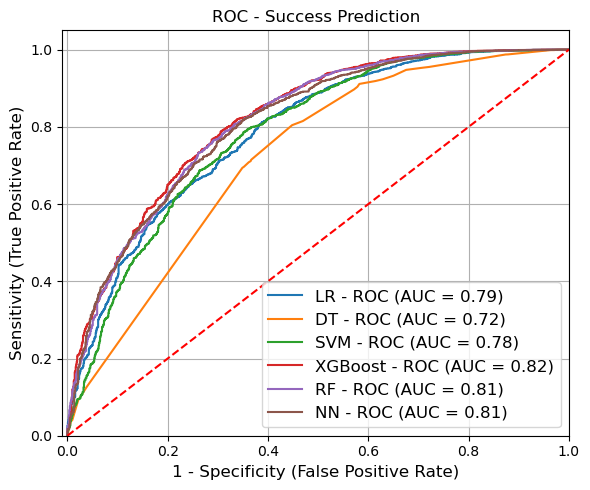

In [117]:
plt.figure(figsize=(6, 5))

models = [
    {'label': 'LR', 'model': best_lr},
    {'label': 'DT', 'model': dt_best_model},
    {'label': 'SVM', 'model': svc_model},
    {'label': 'XGBoost', 'model': best_xgb_model},
    {'label': 'RF', 'model': best_rf},
     {'label': 'NN', 'model': best_nn_model}
]

for m in models:
    model = m['model']
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Use probability estimates if available
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test)[:, 1]
    elif hasattr(model, "decision_function"):
        y_score = model.decision_function(X_test)
        y_score = (y_score - y_score.min()) / (y_score.max() - y_score.min())  # Normalize
    else:
        print(f"⚠️ Model {m['label']} has no probability or decision function. Skipping.")
        continue

    fpr1, tpr1, _ = roc_curve(y_test, y_score)
    auc = roc_auc_score(y_test, y_score)

    plt.plot(fpr1, tpr1, label=f"{m['label']} - ROC (AUC = {auc:.2f})")

plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity (False Positive Rate)', fontsize=12)
plt.ylabel('Sensitivity (True Positive Rate)', fontsize=12)
plt.title('ROC - Success Prediction', fontsize=12)
plt.legend(loc="lower right", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.savefig("roc_Success_Prediction.jpeg", format='jpeg', dpi=400, bbox_inches='tight')
plt.show()

In [118]:
# Dictionary to collect metrics
model_metrics = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'AUC': []
}

for m in models:
    model = m['model']
    label = m['label']
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Get probability or decision function for AUC/ROC
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test)[:, 1]
    elif hasattr(model, "decision_function"):
        y_score = model.decision_function(X_test)
        y_score = (y_score - y_score.min()) / (y_score.max() - y_score.min())  # Normalize
    else:
        print(f"⚠️ Model {label} has no probability or decision function. Skipping.")
        continue

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_score)

    model_metrics['Model'].append(label)
    model_metrics['Accuracy'].append(acc)
    model_metrics['Precision'].append(prec)
    model_metrics['Recall'].append(rec)
    model_metrics['AUC'].append(auc)

# Create summary table
metrics_df = pd.DataFrame(model_metrics)

# Print the summary table with rounded values for readability
print("\n📋 Model Evaluation Summary Table:")
print(metrics_df.round(3))


📋 Model Evaluation Summary Table:
     Model  Accuracy  Precision  Recall    AUC
0       LR     0.715      0.886   0.726  0.787
1       DT     0.805      0.809   0.979  0.722
2      SVM     0.826      0.843   0.953  0.783
3  XGBoost     0.836      0.852   0.955  0.819
4       RF     0.833      0.845   0.962  0.814
5       NN     0.829      0.842   0.960  0.811
